Импорт нужных библиотек

In [2]:
import keras

In [3]:
import os, shutil

In [25]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from zipfile import ZipFile 
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import zipfile
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt

Распаковка архива и извлечение данных:

In [5]:
with zipfile.ZipFile('dogs-vs-cats.zip') as zf: 
    zf.extractall('all')

In [9]:
with zipfile.ZipFile('all/train.zip') as zf: 
    zf.extractall()

Образование нового, меньшего набора, состоящего из трёх поднаборов: тренировочный, валидационный и тренировочный

In [11]:
#Путь к папке, в которую был распакован исходный набор данных
original_dataset_dir = '/Users/Arsen/Downloads/Deep Learning/_ArsenDL/train'

#Путь к папке, в которой мы сделаем набор данных поменьше
base_dir = '/Users/Arsen/Downloads/Deep Learning/_ArsenDL/cats_and_dogs_small'
os.mkdir(base_dir)

#Папки для тренировочной, валидационной и тестовой выборок
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#Папка с изображениями котов для тренировочной выборки
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

#Папка с изображениями собак для тренировочной выборки
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#Папка с изображениями котов для валидационной выборки
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

#Папка с изображениями котов для валидационной выборки
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#Папка с изображениями котов для тестовой выборки
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

#Папка с изображениями котов для тестовой выборки
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#Копируем первую 1000 изображений с котами в train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#Копируем следующие 500 изображений с котами в validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#И ещё 500 изображений с котами копируем в test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#Копируем первую 1000 изображений с собаками в train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#Копируем следующие 500 изображений с собаками в validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#И ещё 500 изображений с собаками копируем в test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Модель небольшой свёрточной нейронной сети

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Настройка модели для обучения

In [19]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

Преобразование изображений в тензоры с вещественными числами

In [20]:
from keras.preprocessing.image import ImageDataGenerator

#Все изображения будут масштабированы с коэффициентом 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        #Все изображения будут приведены к размеру 150х150
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Обучение модели при помощи генератора пакетов

In [21]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

<ipython-input-21-a7acfc8093a4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 71s 698ms/step - loss: 0.6896 - acc: 0.5310 - val_loss: 0.6743 - val_acc: 0.5440
Epoch 2/30
100/100 [==============================] - 64s 643ms/step - loss: 0.6591 - acc: 0.6120 - val_loss: 0.6434 - val_acc: 0.6420
Epoch 3/30
100/100 [==============================] - 64s 636ms/step - loss: 0.6053 - acc: 0.6730 - val_loss: 0.6248 - val_acc: 0.6440
Epoch 4/30
100/100 [==============================] - 66s 657ms/step - loss: 0.5690 - acc: 0.7140 - val_loss: 0.5939 - val_acc: 0.6740
Epoch 5/30
100/100 [==============================] - 69s 690ms/step - loss: 0.5295 - acc: 0.7300 - val_loss: 0.5681 - val_acc: 0.7040
Epoch 6/30
100/100 [==============================] - 64s 640ms/step - loss: 0.5022 - acc: 0.7445 - val_loss: 0.5791 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 64s 643ms/step - loss: 0.4707 - acc: 0.7795 - val_loss: 0.5670 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 6

Сохранение модели

In [22]:
model.save('cats_and_dogs_small_1.h5')

Построение графиков изменения потерь и точности во время обучения

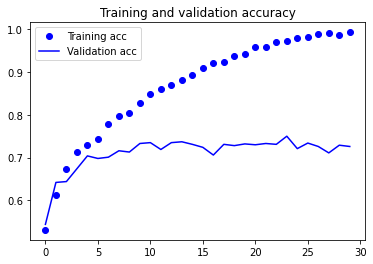

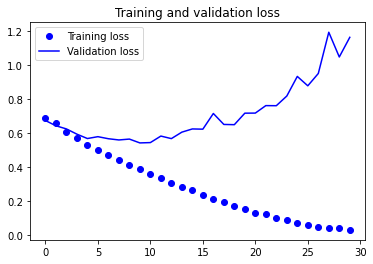

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()